# 1. The relationship between `unmasked` and `synapses` is linear
The count of synapses is related linearly to the `unmasked` value at maximum, and is zero at minimum.

(Super intuitive, but it's good to confirm it!)

In [4]:
%matplotlib inline

In [5]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

:0: FutureWarning: IPython widgets are experimental and may change in the future.


In [6]:
import csv

data = open('../data/data.csv', 'r').readlines()
fieldnames = ['x', 'y', 'z', 'unmasked', 'synapses']
reader = csv.reader(data)
reader.next()

rows = [[int(col) for col in row] for row in reader]

sorted_x = sorted(list(set([r[0] for r in rows])))
sorted_y = sorted(list(set([r[1] for r in rows])))
sorted_z = sorted(list(set([r[2] for r in rows])))

vol = np.zeros((len(sorted_x), len(sorted_y), len(sorted_z)))
for r in rows:
    vol[sorted_x.index(r[0]), sorted_y.index(r[1]), sorted_z.index(r[2])] = r[-1]

/usr/local/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


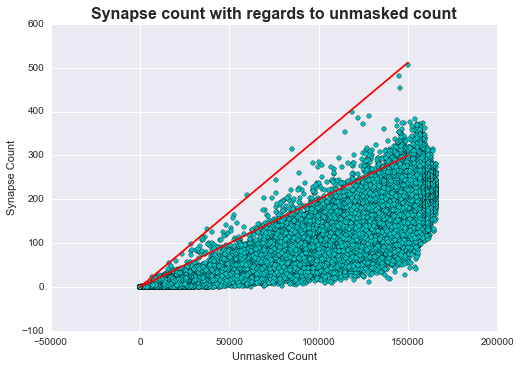

In [7]:
x = [r[3] for r in rows]
y = [r[4] for r in rows]
plt.scatter(x=x, y=y, c='c')
plt.hold(True)
plt.plot([0, 150000], [0, 512], color="r")
plt.plot([0, 150000], [0, 300], color="r")
plt.xlabel("Unmasked Count")
plt.ylabel("Synapse Count")
plt.title("Synapse count with regards to unmasked count", fontdict={
        'fontsize': '16',
        'fontweight': 'bold'
})
plt.hold(False)

In general, synapse count is sublinearly related to the unmasked count.

# 2. Heatmap of density over data

In [1]:
from PIL import Image
import urllib, cStringIO

file = cStringIO.StringIO(urllib.urlopen("http://openconnecto.me/ocp/ca/bock11/image/xy/7/0,1050/0,936/2917/").read())
img = Image.open(file)
img_array = np.array(img)

KeyboardInterrupt: 

In [ ]:
plt.imshow(img_array)
plt.hold(True)
plt.axis('off')
#plt.scatter(x=[r[0]/4.2 for r in rows], y=[(r[1]/3)-350 for r in rows], 'r-', alpha=0.2)